<a href="https://colab.research.google.com/github/jvo024/spotify_songs_ads504/blob/jvo-eda/spotify_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

## 1. Import Dataset

In [ ]:
base_df = pd.read_csv('https://raw.githubusercontent.com/orzanai/Moodify/main/Datasets/278k_song_labelled.csv')
base_df.head()

,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
0,0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2
1,1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1
2,2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1
3,3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0
4,4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1


In [ ]:
base_df.describe()

,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
count,277938.000000,2.779380e+05,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,2.779380e+05,277938.000000
mean,138968.500000,2.324961e+05,0.552583,0.556866,-10.363654,0.087913,0.386583,0.255044,0.189217,0.449602,119.196002,4.754654e-07,1.179101
std,80233.933896,1.171830e+05,0.188905,0.279681,6.672049,0.112500,0.364504,0.373745,0.163596,0.267471,30.462256,9.190229e-07,1.021033
min,0.000000,6.706000e+03,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,69484.250000,1.720130e+05,0.431000,0.342000,-12.747000,0.035900,0.033800,0.000000,0.096200,0.220000,95.072250,1.531461e-07,0.000000
50%,138968.500000,2.131055e+05,0.571000,0.591000,-8.397000,0.047100,0.262000,0.001090,0.121000,0.434000,119.940000,2.345459e-07,1.000000
75%,208452.750000,2.648660e+05,0.693000,0.792000,-5.842000,0.082200,0.754000,0.645000,0.227000,0.665000,138.869750,4.449937e-07,2.000000
max,277937.000000,3.919895e+06,0.989000,1.000000,4.882000,0.965000,0.996000,1.000000,1.000000,1.000000,244.947000,5.971860e-05,3.000000


## 2. EDA & Pre-Processing

In [ ]:
# Remove iirevelevant columns
drop = ['Unnamed: 0']
base_df.drop(drop, axis = 1, inplace = True)

# Identify null values
base_df.isna().sum()

duration (ms)       0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
spec_rate           0
labels              0
dtype: int64

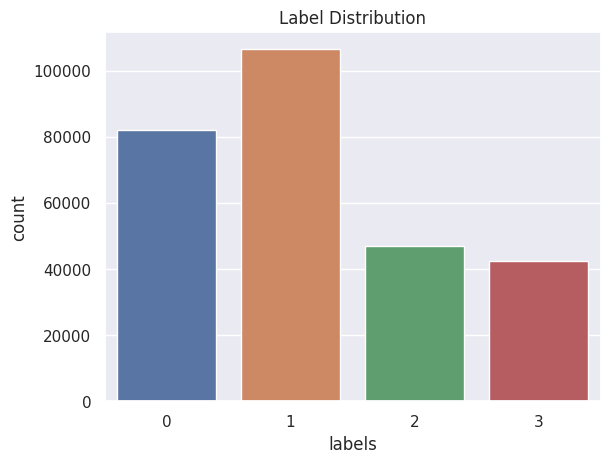

In [ ]:
sns.set(style="darkgrid")
sns.countplot(x = base_df['labels'])
plt.title('Label Distribution')
plt.show()

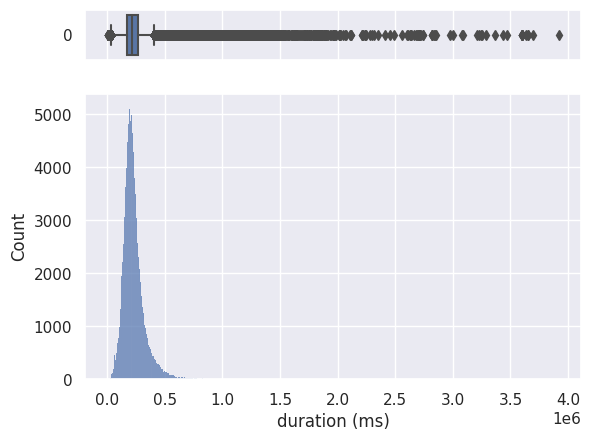

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(base_df["duration (ms)"], orient ="h", ax=ax_box)
sns.histplot(data=base_df, x="duration (ms)", ax=ax_hist)

ax_box.set(xlabel='')
plt.show()

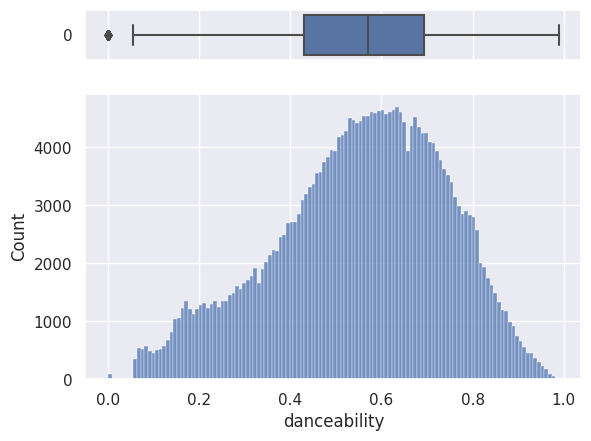

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(base_df["danceability"], orient ="h", ax=ax_box)
sns.histplot(data=base_df, x="danceability", ax=ax_hist)

ax_box.set(xlabel='')
plt.show()

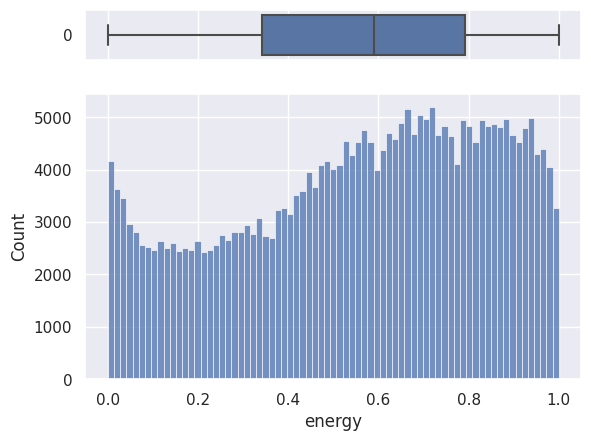

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(base_df["energy"], orient ="h", ax=ax_box)
sns.histplot(data=base_df, x="energy", ax=ax_hist)

ax_box.set(xlabel='')
plt.show()

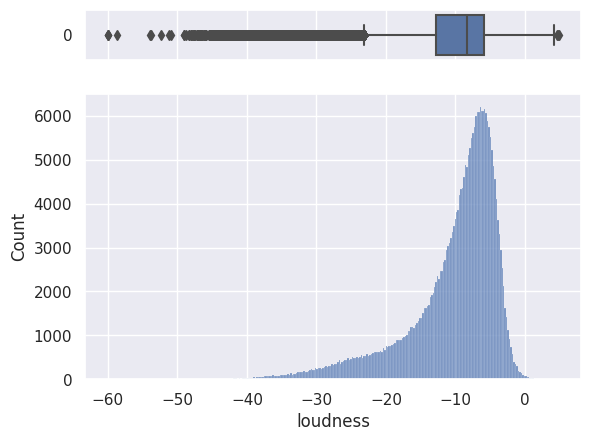

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(base_df["loudness"], orient ="h", ax=ax_box)
sns.histplot(data=base_df, x="loudness", ax=ax_hist)

ax_box.set(xlabel='')
plt.show()

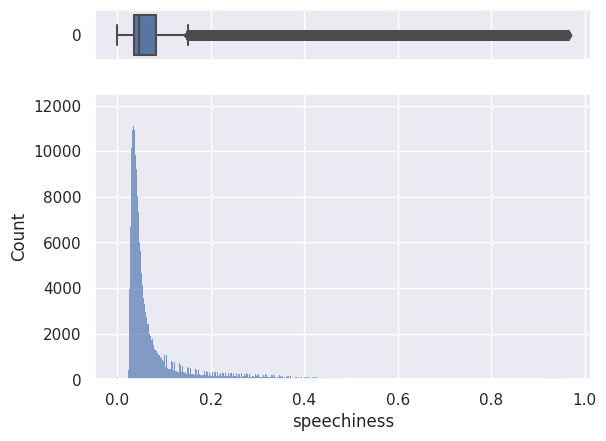

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(base_df["speechiness"], orient ="h", ax=ax_box)
sns.histplot(data=base_df, x="speechiness", ax=ax_hist)

ax_box.set(xlabel='')
plt.show()

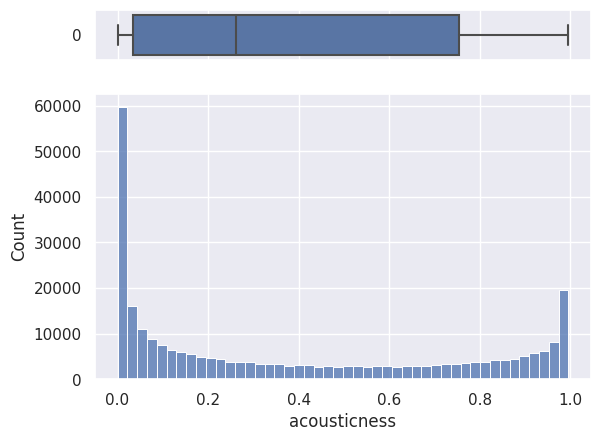

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(base_df["acousticness"], orient ="h", ax=ax_box)
sns.histplot(data=base_df, x="acousticness", ax=ax_hist)

ax_box.set(xlabel='')
plt.show()

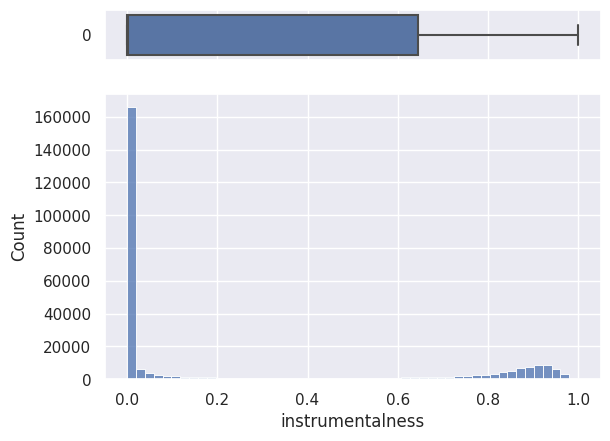

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(base_df["instrumentalness"], orient ="h", ax=ax_box)
sns.histplot(data=base_df, x="instrumentalness", ax=ax_hist)

ax_box.set(xlabel='')
plt.show()

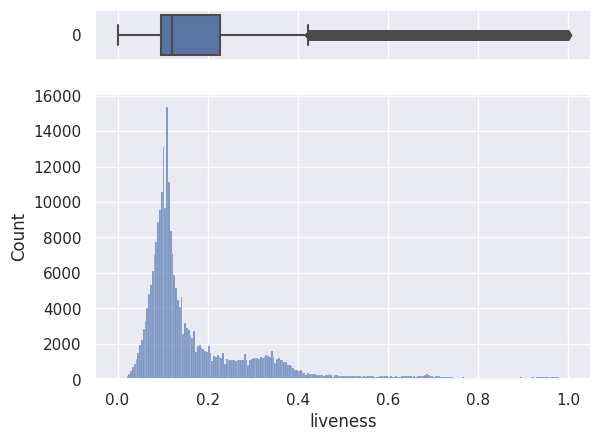

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(base_df["liveness"], orient ="h", ax=ax_box)
sns.histplot(data=base_df, x="liveness", ax=ax_hist)

ax_box.set(xlabel='')
plt.show()

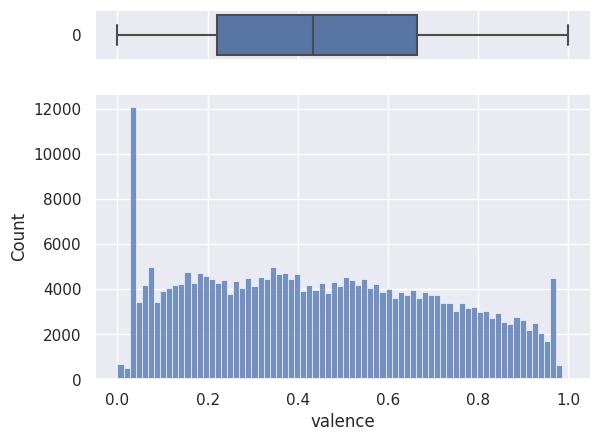

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(base_df["valence"], orient ="h", ax=ax_box)
sns.histplot(data=base_df, x="valence", ax=ax_hist)

ax_box.set(xlabel='')
plt.show()

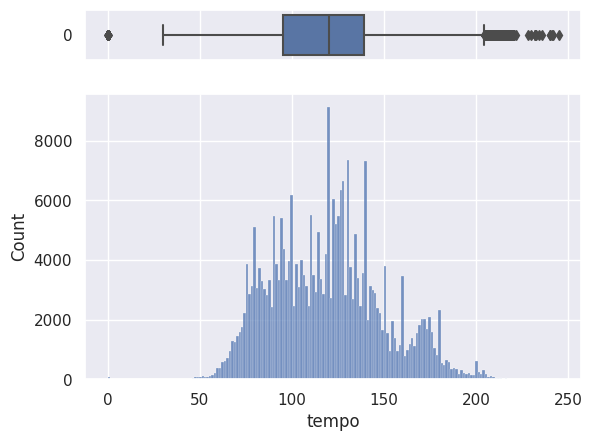

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(base_df["tempo"], orient ="h", ax=ax_box)
sns.histplot(data=base_df, x="tempo", ax=ax_hist)

ax_box.set(xlabel='')
plt.show()

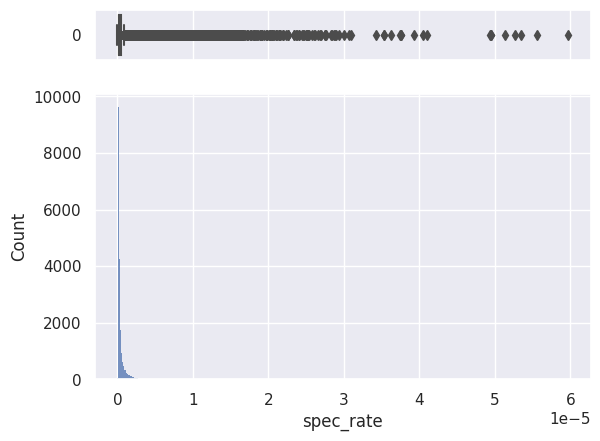

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(base_df["spec_rate"], orient ="h", ax=ax_box)
sns.histplot(data=base_df, x="spec_rate", ax=ax_hist)

ax_box.set(xlabel='')
plt.show()

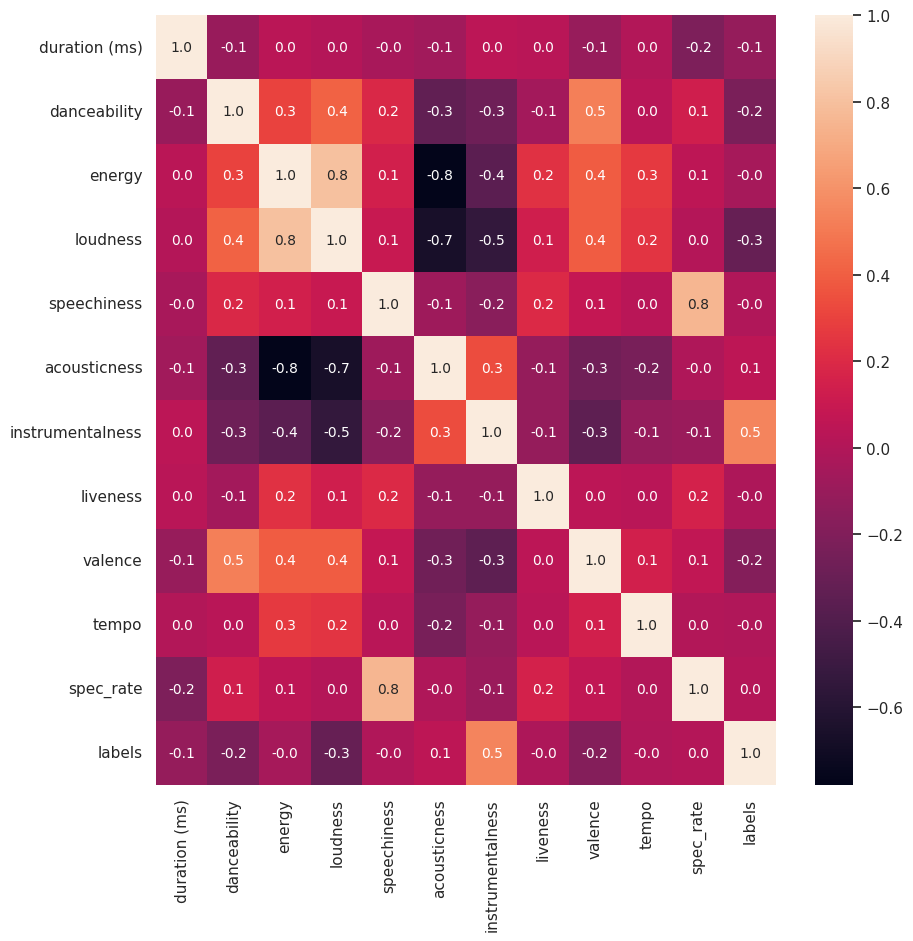

In [ ]:
corr = base_df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, cbar = True, annot = True,
            fmt = '.1f', annot_kws = {'size': 10})

plt.show()

## 3. Building Models

## 4. Validation & Performance Metrics

## 5. Modeling Results & Findings